In [3]:
import numpy as np
import torch as th
import pickle
from torch.autograd import Variable
from collections import defaultdict as ddict
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### Plot graphs with features

Embedding matrix shape: (102, 6)


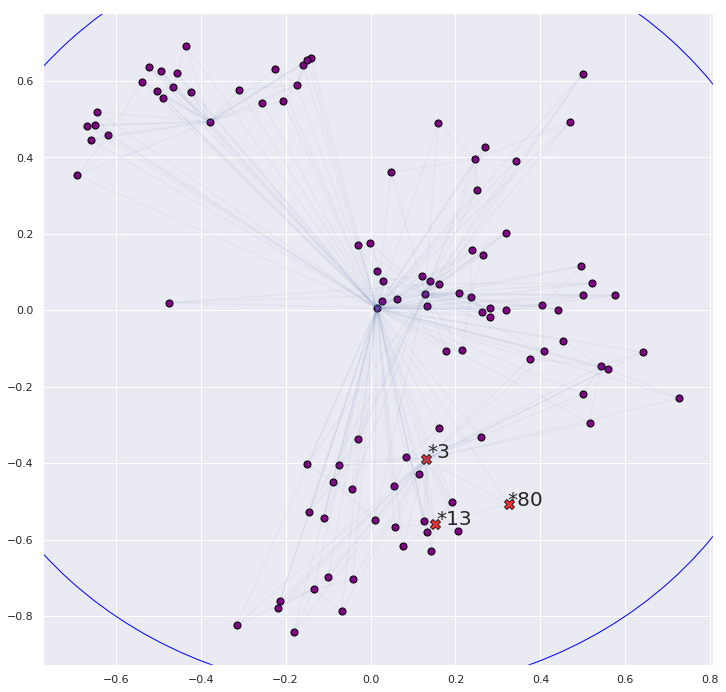

In [7]:
d0 =4
d1=5

filepath = '../data/simple_supervised_embed.pth'
graphpath =  filepath[:-4] + '_graph.p'
model = th.load(filepath)
graph = pickle.load(open(graphpath, 'rb'))
edges = graph['edges']
embed = model['model']['lt.weight'].numpy()
print("Embedding matrix shape:", embed.shape)
colors = np.zeros(len(model['objects']))
for idx in range(len(colors)):
    if model['objects'][idx]['feature'] == -1:
        colors[idx] = 1
    else:
        colors[idx] = -1
printables = [13, 80, 3]# + [x for x in np.arange(0, 10)]

plt.figure(figsize=(12,12))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,d0]
    y = embed[idx,d1]
    
    if model['objects'][idx]['feature'] == -1:
        fsize = 10
        size = 200
        marker = 'X'
        color = 'orange'
        a=0.4
    else:
        fsize = 20
        size = 200
        marker = '.'
        color= 'purple'
        a=1    

    if model['objects'][idx]['name'] in printables:
        displacement= np.sign(np.random.random(2) - 0.5) * 0.003
        size = 100
        color='red'
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker='X')
        plt.text(x + ( displacement[0]), y + ( displacement[1]) , '*'+str(model['objects'][idx]['name']), fontsize=fsize)
    else: 
        ax.scatter(x=x, y=y, c=color, alpha=a, s=size, edgecolor='black', marker=marker, )

        
for edge in edges:
    x0 = embed[edge[0], d0]
    y0 = embed[edge[0], d1]

    x1 = embed[edge[1], d0]
    y1 = embed[edge[1], d1]

    plt.plot([x0, x1], [y0, y1], 'b', alpha=0.05)
        
ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

### Plot simple graphs without features

Embedding matrix shape: (148, 6)


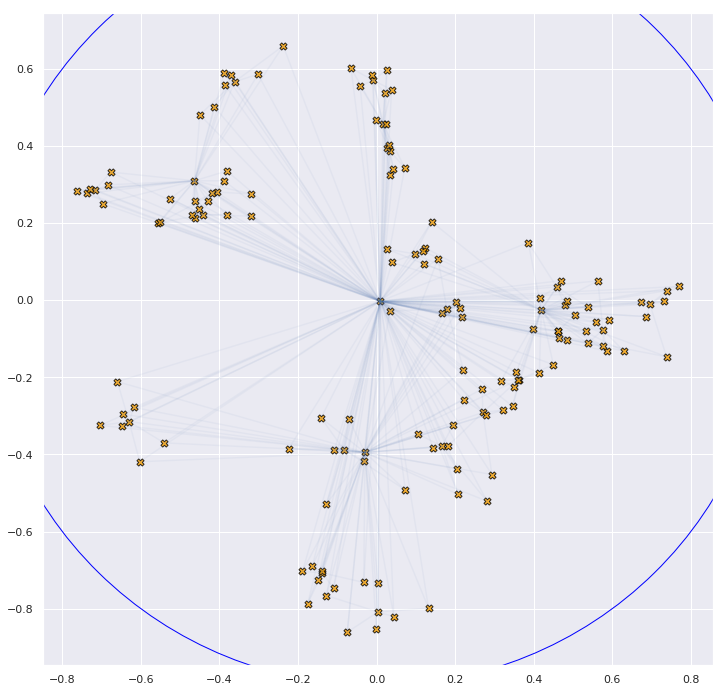

In [18]:
np.random.seed(7)
d0 = 4
d1 = 5

filepath = '../data/simple_supervised_embed.pth'
graphpath =  filepath[:-4] + '_graph.p'
model = th.load(filepath)
graph = pickle.load(open(graphpath, 'rb'))
edges = graph['edges']
embed = model['model']['lt.weight'].numpy()
print("Embedding matrix shape:", embed.shape)
colors = np.zeros(len(model['objects']))
plt.figure(figsize=(12,12))
ax = plt.gca()
for idx in range(len(model['objects'])):
    x = embed[idx,d0]
    y = embed[idx,d1]
    
    fsize = 20
    size = 200
    marker = 'X'
    color = 'orange'

    rootest = [str(x) for x in np.arange(10)] + [str(x) for x in np.arange(86, 101)]
    if model['objects'][idx] in rootest:
        displacement= np.sign(np.random.random(2) - 0.5) * 0.03
        size = 100
        color='red'
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)

        plt.text(x + ( displacement[0]), y + ( displacement[1]) , '*'+model['objects'][idx], fontsize=fsize)

    else:
        size=50
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
        
for edge in edges:

    x0 = embed[edge[0], d0]
    y0 = embed[edge[0], d1]

    x1 = embed[edge[1], d0]
    y1 = embed[edge[1], d1]

    plt.plot([x0, x1], [y0, y1], 'b', alpha=0.05)

ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

In [14]:
graph['objects']

[{'name': 1, 'label': '1', 'feature': 1},
 {'name': 0, 'label': '0', 'feature': 0},
 {'name': 2, 'label': '2', 'feature': 2},
 {'name': 3, 'label': '3', 'feature': 3},
 {'name': 4, 'label': '4', 'feature': 4},
 {'name': 5, 'label': '5', 'feature': 5},
 {'name': 6, 'label': '6', 'feature': 6},
 {'name': 7, 'label': '7', 'feature': 7},
 {'name': 8, 'label': '8', 'feature': 8},
 {'name': 9, 'label': '9', 'feature': 9},
 {'name': 10, 'label': '10', 'feature': 10},
 {'name': 11, 'label': '11', 'feature': 11},
 {'name': 12, 'label': '12', 'feature': 12},
 {'name': 13, 'label': '13', 'feature': 13},
 {'name': 14, 'label': '14', 'feature': 14},
 {'name': 15, 'label': '15', 'feature': 15},
 {'name': 16, 'label': '16', 'feature': 16},
 {'name': 17, 'label': '17', 'feature': 17},
 {'name': 18, 'label': '18', 'feature': 18},
 {'name': 19, 'label': '19', 'feature': 19},
 {'name': 20, 'label': '20', 'feature': 20},
 {'name': 21, 'label': '21', 'feature': 21},
 {'name': 22, 'label': '22', 'feature': 